In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

In [98]:
fake_job_postings = pd.read_csv('fake_job_postings.csv')

In [99]:
fake_job_postings.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,18497.0000,18497.000000,18497.000000,18497.000000,18497.000000
mean,9249.0000,0.043953,0.781857,0.486295,0.080175
std,5339.7683,0.204996,0.412997,0.499826,0.271572
min,1.0000,0.000000,0.000000,0.000000,0.000000
25%,4625.0000,0.000000,1.000000,0.000000,0.000000
50%,9249.0000,0.000000,1.000000,0.000000,0.000000
75%,13873.0000,0.000000,1.000000,1.000000,0.000000
max,18497.0000,1.000000,1.000000,1.000000,1.000000


In [100]:
fake_job_postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18497 entries, 0 to 18496
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               18497 non-null  int64 
 1   title                18497 non-null  object
 2   location             18139 non-null  object
 3   department           6601 non-null   object
 4   salary_range         3023 non-null   object
 5   company_profile      14814 non-null  object
 6   description          18495 non-null  object
 7   requirements         15700 non-null  object
 8   benefits             11026 non-null  object
 9   telecommuting        18497 non-null  int64 
 10  has_company_logo     18497 non-null  int64 
 11  has_questions        18497 non-null  int64 
 12  employment_type      14861 non-null  object
 13  required_experience  11143 non-null  object
 14  required_education   10088 non-null  object
 15  industry             13418 non-null  object
 16  func

In [101]:
fake_job_postings.isnull().sum()

job_id                     0
title                      0
location                 358
department             11896
salary_range           15474
company_profile         3683
description                2
requirements            2797
benefits                7471
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3636
required_experience     7354
required_education      8409
industry                5079
function                6678
fraudulent                 0
dtype: int64

In [102]:
fake_job_postings.location = fake_job_postings.location.fillna('Not Specified')

In [103]:
fake_job_postings.isnull().sum()

job_id                     0
title                      0
location                   0
department             11896
salary_range           15474
company_profile         3683
description                2
requirements            2797
benefits                7471
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3636
required_experience     7354
required_education      8409
industry                5079
function                6678
fraudulent                 0
dtype: int64

#### Why US?

In [104]:
location_of_fraudulent = fake_job_postings.location[fake_job_postings.fraudulent == 1].value_counts()[:5]

In [105]:
location = fake_job_postings.location.value_counts()[:5]

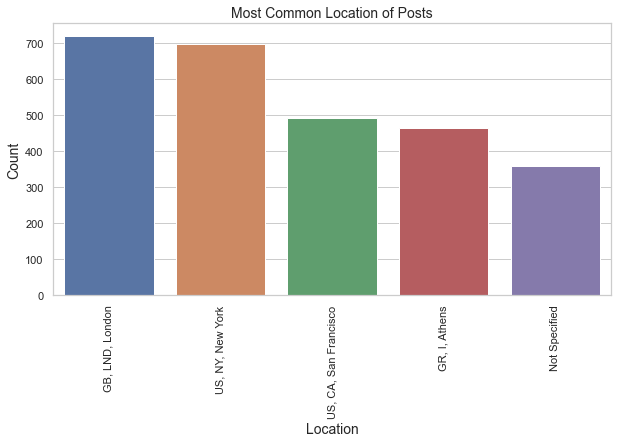

In [106]:
plt.figure(figsize = (10,5))
sns.barplot(x = location.index, y = location, )
plt.title("Most Common Location of Posts", fontdict = {"fontsize" : 14})
plt.xlabel("Location", fontdict = {"fontsize" : 14})
plt.ylabel("Count", fontdict = {"fontsize" : 14})
plt.xticks(rotation=90);

In [107]:
fake_job_postings_US = fake_job_postings[fake_job_postings['location'].str.contains("US")]

In [108]:
len(fake_job_postings_US)

11185

In [109]:
len(fake_job_postings)

18497

In [110]:
loc_split =[]
for loc in fake_job_postings_US.location:
    loc_split.append(loc.split(','))

loc_split = pd.DataFrame(loc_split)

loc_split = loc_split[[1, 2]]

loc_split = loc_split.rename(columns={1: "state", 2:'city'})

In [111]:
loc_split

,state,city
0,None,None
1,None,None
2,None,None
3,None,None
4,None,None
...,...,...
11180,WY,Cheyenne
11181,WY,Cheyenne
11182,WY,Cheyenne
11183,WY,Laramie


In [112]:
len(fake_job_postings_US)/len(fake_job_postings)

0.6046926528626264

In [113]:
fake_job_postings_US = fake_job_postings_US.reset_index()

In [114]:
fake_job_postings_US.head()

,index,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,6904,43,Jr. Developer,US,NaN,40000-50000,NaN,Entry level Software DeveloperLocation : Atlan...,NaN,NaN,0,0,0,Full-time,Entry level,Bachelor's Degree,Computer Software,Engineering,0
1,6905,174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
2,6906,231,Customer Service Associate,US,NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Legal Services,Customer Service,0
3,6907,369,Jr. Quality Assurance Engineer,US,NaN,40000-50000,NaN,Jr. QA EngineerExperience :1-5 yearsLocation :...,NaN,NaN,0,0,0,Full-time,Entry level,Bachelor's Degree,Computer Software,Engineering,0
4,6908,393,PASSIONATE EXPERIENCED PCP's NEEDED TODAY! WE ...,US,NaN,NaN,MISSION:GoldLeaf HomeCare is revolutionizing h...,DESCRIPTIONAbout the Company &amp; the Opportu...,Required Qualification:2 years+ of proven PCP ...,We provide:* Competitive rates for PCP's per h...,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [115]:
fake_job_postings_US = fake_job_postings_US.join(loc_split)

In [116]:
fake_job_postings_US.shape

(11185, 21)

In [117]:
fake_job_postings_US.head()

,index,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,...,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,state,city
0,6904,43,Jr. Developer,US,NaN,40000-50000,NaN,Entry level Software DeveloperLocation : Atlan...,NaN,NaN,...,0,0,Full-time,Entry level,Bachelor's Degree,Computer Software,Engineering,0,None,None
1,6905,174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",...,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1,None,None
2,6906,231,Customer Service Associate,US,NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,...,1,0,Full-time,Entry level,High School or equivalent,Legal Services,Customer Service,0,None,None
3,6907,369,Jr. Quality Assurance Engineer,US,NaN,40000-50000,NaN,Jr. QA EngineerExperience :1-5 yearsLocation :...,NaN,NaN,...,0,0,Full-time,Entry level,Bachelor's Degree,Computer Software,Engineering,0,None,None
4,6908,393,PASSIONATE EXPERIENCED PCP's NEEDED TODAY! WE ...,US,NaN,NaN,MISSION:GoldLeaf HomeCare is revolutionizing h...,DESCRIPTIONAbout the Company &amp; the Opportu...,Required Qualification:2 years+ of proven PCP ...,We provide:* Competitive rates for PCP's per h...,...,1,0,NaN,NaN,NaN,NaN,NaN,0,None,None


In [118]:
indexloc = fake_job_postings_US[ (fake_job_postings_US['state'] == '') | (fake_job_postings_US['city'] == '') ].index
fake_job_postings_US.drop(indexloc, inplace=True)

In [119]:
fake_job_postings_US[ (fake_job_postings_US['state'] == '') | (fake_job_postings_US['city'] == '') ]

,index,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,...,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,state,city


In [120]:
fake_job_postings_US = fake_job_postings_US[['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'state', 'city']]


In [121]:
fake_job_postings_US.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,state,city
0,43,Jr. Developer,US,NaN,40000-50000,NaN,Entry level Software DeveloperLocation : Atlan...,NaN,NaN,0,0,0,Full-time,Entry level,Bachelor's Degree,Computer Software,Engineering,0,None,None
1,174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1,None,None
2,231,Customer Service Associate,US,NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Legal Services,Customer Service,0,None,None
3,369,Jr. Quality Assurance Engineer,US,NaN,40000-50000,NaN,Jr. QA EngineerExperience :1-5 yearsLocation :...,NaN,NaN,0,0,0,Full-time,Entry level,Bachelor's Degree,Computer Software,Engineering,0,None,None
4,393,PASSIONATE EXPERIENCED PCP's NEEDED TODAY! WE ...,US,NaN,NaN,MISSION:GoldLeaf HomeCare is revolutionizing h...,DESCRIPTIONAbout the Company &amp; the Opportu...,Required Qualification:2 years+ of proven PCP ...,We provide:* Competitive rates for PCP's per h...,0,1,0,NaN,NaN,NaN,NaN,NaN,0,None,None


In [122]:
fake_job_postings_US = fake_job_postings_US[fake_job_postings_US['city'].notna()]
fake_job_postings_US = fake_job_postings_US[fake_job_postings_US['state'].notna()]

In [123]:
fake_job_postings_US.shape

(11118, 20)

In [124]:
fake_job_postings_US.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,state,city
67,65,SENIOR FINANCE SOFTWARE RESEARCHER AND ENGINEER,"US, NY, New York",NaN,NaN,NaN,DUTIES: Conduct research for building technica...,REQUIREMENTS: Bachelor’s degree in Mathematics...,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,NY,New York
68,96,Senior Marketing Manager,"US, IA, Wever",Marketing,NaN,Industrial Color Software is a division of Ind...,Senior Marketing ManagerOur photography and vi...,"Reporting to the VP Marketing, this person wil...",Full benefits,0,1,0,Full-time,Director,Master's Degree,Internet,Marketing,0,IA,Wever
69,159,Customer Support Professional,"US, DC, Washington",NaN,NaN,NaN,EEO LLC is an IBO partnered with Arise Virtual...,Must be 18 years of age or older Must live in ...,Guaranteed work position with the client that ...,1,0,1,Contract,NaN,NaN,NaN,Customer Service,0,DC,Washington
70,188,Medical Scribe (Testing),"US, FL, Fort Worth",NaN,NaN,Building a better scribe company and the world...,As a medical scribe you will shadow a provider...,You are our ideal candidate if you are activel...,NaN,0,1,1,Part-time,Entry level,Some College Coursework Completed,Medical Practice,Other,0,FL,Fort Worth
71,192,Technical Co-Founder,"US, MD,",NaN,NaN,NaN,The right professional will be self-motivated ...,SPECIFIC SKILLS/PERSONA: EDUCATION: Bachelor’s...,WHY I HEART SAVVY? We offer a collaborative te...,0,0,0,NaN,NaN,NaN,NaN,NaN,0,MD,


In [125]:
fake_job_postings_US['state_city'] = fake_job_postings_US['state'] + ", " + fake_job_postings_US['city']

In [126]:
fake_job_postings_US.isna().sum()

job_id                    0
title                     0
location                  0
department             7851
salary_range           9462
company_profile        2340
description               0
requirements           1827
benefits               4853
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        1884
required_experience    4513
required_education     4699
industry               2799
function               4051
fraudulent                0
state                     0
city                      0
state_city                0
dtype: int64

In [127]:
fake_job_postings_US.city = fake_job_postings_US.city.str.strip()
fake_job_postings_US.state = fake_job_postings_US.state.str.strip()

In [128]:
fake_job_postings_US.shape

(11118, 21)

In [129]:
fake_job_postings_US

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,state,city,state_city
67,65,SENIOR FINANCE SOFTWARE RESEARCHER AND ENGINEER,"US, NY, New York",NaN,NaN,NaN,DUTIES: Conduct research for building technica...,REQUIREMENTS: Bachelor’s degree in Mathematics...,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,0,NY,New York,"NY, New York"
68,96,Senior Marketing Manager,"US, IA, Wever",Marketing,NaN,Industrial Color Software is a division of Ind...,Senior Marketing ManagerOur photography and vi...,"Reporting to the VP Marketing, this person wil...",Full benefits,0,...,0,Full-time,Director,Master's Degree,Internet,Marketing,0,IA,Wever,"IA, Wever"
69,159,Customer Support Professional,"US, DC, Washington",NaN,NaN,NaN,EEO LLC is an IBO partnered with Arise Virtual...,Must be 18 years of age or older Must live in ...,Guaranteed work position with the client that ...,1,...,1,Contract,NaN,NaN,NaN,Customer Service,0,DC,Washington,"DC, Washington"
70,188,Medical Scribe (Testing),"US, FL, Fort Worth",NaN,NaN,Building a better scribe company and the world...,As a medical scribe you will shadow a provider...,You are our ideal candidate if you are activel...,NaN,0,...,1,Part-time,Entry level,Some College Coursework Completed,Medical Practice,Other,0,FL,Fort Worth,"FL, Fort Worth"
71,192,Technical Co-Founder,"US, MD,",NaN,NaN,NaN,The right professional will be self-motivated ...,SPECIFIC SKILLS/PERSONA: EDUCATION: Bachelor’s...,WHY I HEART SAVVY? We offer a collaborative te...,0,...,0,NaN,NaN,NaN,NaN,NaN,0,MD,,"MD,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11180,790,Web Analytics Specialist,"US, WY, Cheyenne",NaN,NaN,NaN,A dedicated QPIFY Team is currently looking fo...,NaN,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,0,WY,Cheyenne,"WY, Cheyenne"
11181,2024,Content Contributor,"US, WY, Cheyenne",NaN,NaN,NaN,A dedicated QPIFY Team is currently looking fo...,NaN,NaN,0,...,0,Full-time,Entry level,Bachelor's Degree,Online Media,Advertising,0,WY,Cheyenne,"WY, Cheyenne"
11182,17274,Content Strategist,"US, WY, Cheyenne",NaN,NaN,NaN,A dedicated QPIFY Team is currently looking fo...,NaN,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,0,WY,Cheyenne,"WY, Cheyenne"
11183,9214,Graduates: English Teacher Abroad (Conversatio...,"US, WY, Laramie",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0,...,1,Contract,Entry level,Bachelor's Degree,Education Management,Education,0,WY,Laramie,"WY, Laramie"


In [253]:
##fake_job_postings_US["location"].unique()

In [254]:

##fake_job_postings_US[(fake_job_postings_US['location'])==' ...']


In [130]:
len(fake_job_postings_US[fake_job_postings_US.fraudulent == 0]), len(fake_job_postings_US[fake_job_postings_US.fraudulent == 1]), 

(9868, 1250)

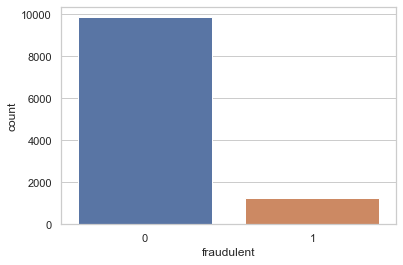

In [131]:
sns.countplot(x='fraudulent', data=fake_job_postings_US);

In [132]:

fake_job_postings_US.shape

(11118, 21)

#### Outlier

In [133]:
df_num = fake_job_postings_US[['telecommuting','has_company_logo','has_questions','fraudulent']]


In [134]:
df_num.shape

(11118, 4)

In [135]:
df_num.describe()

,telecommuting,has_company_logo,has_questions,fraudulent
count,11118.000000,11118.000000,11118.000000,11118.000000
mean,0.051088,0.740151,0.441087,0.112430
std,0.220188,0.438571,0.496539,0.315909
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


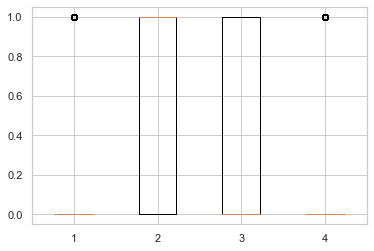

In [136]:
plt.boxplot(df_num)
plt.show()

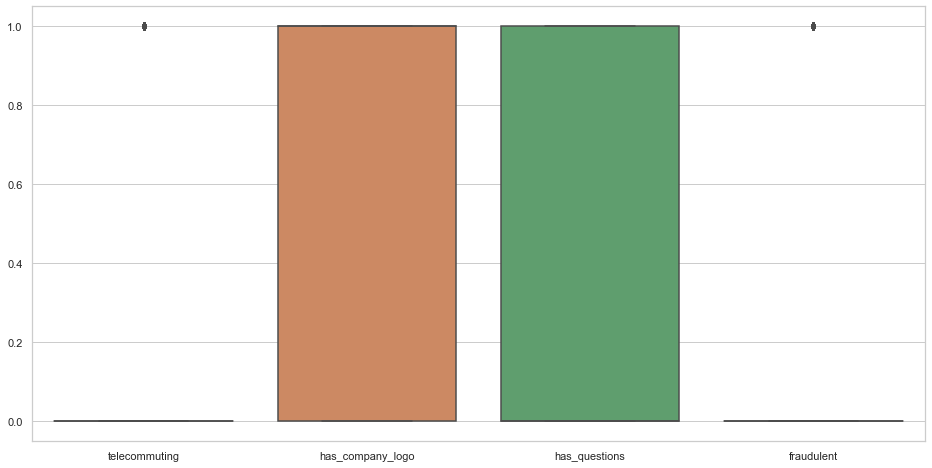

In [137]:
plt.figure(figsize=[16,8])
sns.boxplot(data = df_num)
plt.show()

In [138]:
def sns_countplot(feature):
    sns.countplot(x=feature, data=fake_job_postings_US, hue="fraudulent",
              order=fake_job_postings_US[feature].value_counts().iloc[:10].index)
    plt.xticks(rotation=90)
    title = feature + ' fake job count'
    plt.title('Location Fake Jobs')
    plt.show()

In [139]:
fake_job_postings_US.shape

(11118, 21)

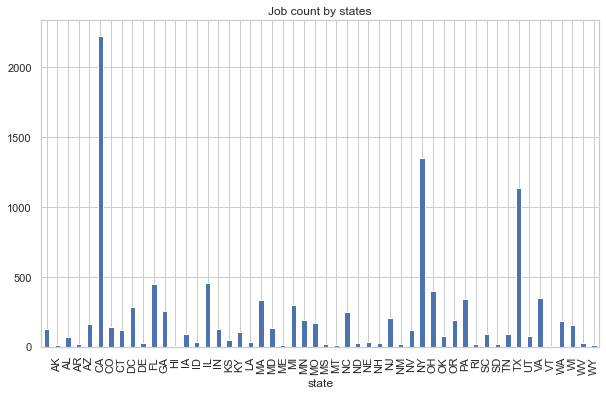

In [140]:
plt.figure(figsize=(10,6))
fake_job_postings_US.groupby('state').fraudulent.count().plot(kind='bar', title='Job count by states');

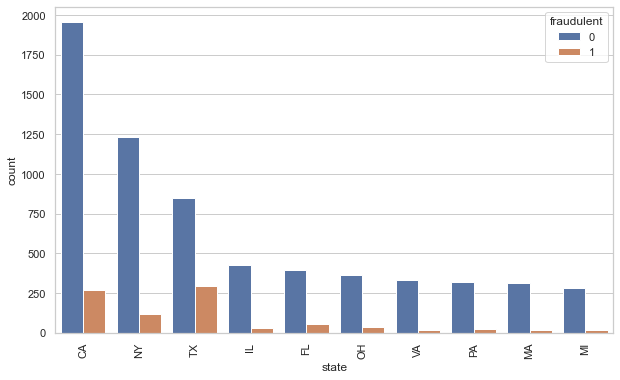

In [141]:
plt.figure(figsize=(10,6))
sns.countplot(x='state', data=fake_job_postings_US, hue="fraudulent", order=fake_job_postings_US['state'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

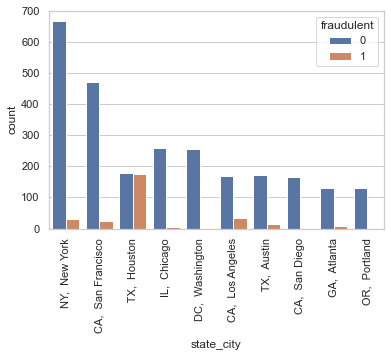

In [142]:
sns.countplot(x='state_city', data=fake_job_postings_US, hue="fraudulent", order=fake_job_postings_US['state_city'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()


In [143]:
def sns_countplot(feature):
    sns.countplot(x=feature, data=fake_job_postings_US, hue="fraudulent",
              order=fake_job_postings_US[feature].value_counts().iloc[:10].index)
    plt.xticks(rotation=90)
    title = feature + ' fake job count'
    plt.title(title)
    plt.show()

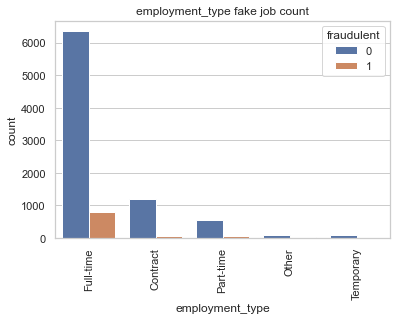

In [144]:
sns_countplot('employment_type');

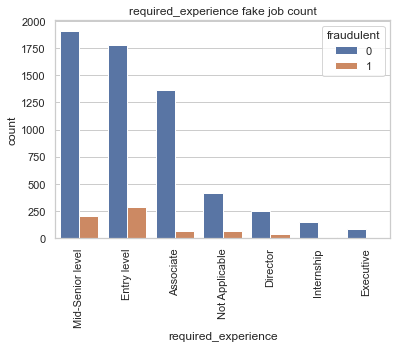

In [145]:
sns_countplot('required_experience');

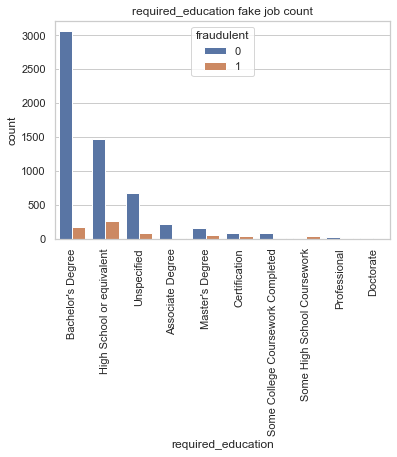

In [146]:
sns_countplot('required_education');

In [147]:

fake_job_postings_US.shape

(11118, 21)

In [148]:
bckup=fake_job_postings_US.copy()

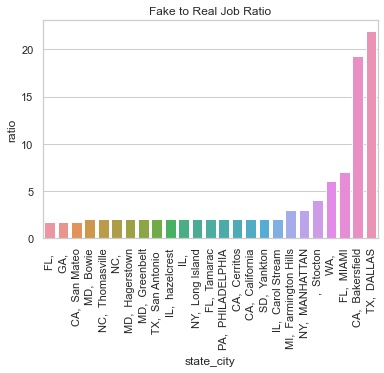

In [149]:
location_ratio = round(fake_job_postings_US[fake_job_postings_US.fraudulent == 1].groupby('state_city').state_city.count()/fake_job_postings_US[fake_job_postings_US.fraudulent == 0].groupby('state_city').state_city.count(), 2)
location_ratio = pd.DataFrame({'state_city':location_ratio.index, 'ratio':location_ratio.values})

fake_job_postings_US = fake_job_postings_US.merge(location_ratio)

fake_job_postings_US.ratio.fillna(0, inplace=True)
location_ratio_plot = location_ratio[location_ratio.ratio >= 1.5]
sns.barplot(data=location_ratio_plot.sort_values(by='ratio'), x='state_city', y='ratio')
plt.xticks(rotation=90)
plt.title('Fake to Real Job Ratio')
plt.show()

In [150]:
fake_job_postings_US.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,employment_type,required_experience,required_education,industry,function,fraudulent,state,city,state_city,ratio
0,65,SENIOR FINANCE SOFTWARE RESEARCHER AND ENGINEER,"US, NY, New York",NaN,NaN,NaN,DUTIES: Conduct research for building technica...,REQUIREMENTS: Bachelor’s degree in Mathematics...,NaN,0,...,NaN,NaN,NaN,NaN,NaN,0,NY,New York,"NY, New York",0.05
1,565,Wordpress Designer and Expert for Startup | St...,"US, NY, New York",NaN,NaN,"StudyHall creates opportunities for college, u...",#URL_ab309fb672a2b26317bd303c09c3c6762986d45c2...,NaN,NaN,0,...,Part-time,Internship,NaN,NaN,Information Technology,0,NY,New York,"NY, New York",0.05
2,1917,Senior Publishing Specialist,"US, NY, New York",NaN,NaN,NaN,The Senior Publishing Specialist will be part ...,Minimum of 3 – 4 years experience in Regulator...,NaN,0,...,NaN,NaN,NaN,NaN,NaN,0,NY,New York,"NY, New York",0.05
3,2993,Regional Account Manager,"US, NY, New York",NaN,NaN,VeriPic is a leading supplier of enterprise ph...,Regional Account Manager – Enterprise Software...,Job Requirements:4 Year University Degree5+ ye...,Job Benefits:Standard Benefits: This position ...,1,...,Full-time,Mid-Senior level,Bachelor's Degree,Law Enforcement,Sales,0,NY,New York,"NY, New York",0.05
4,3259,Program Manager,"US, NY, New York",NaN,NaN,Roka Security is a boutique security firm that...,Roka Security requires a person qualified to b...,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,0,NY,New York,"NY, New York",0.05


In [151]:

fake_job_postings_US.shape

(11118, 22)

In [152]:
df1=fake_job_postings_US

In [153]:
df1.shape

(11118, 22)

In [154]:
df1.fillna('Not Specified', inplace=True)
df1 = df1.replace(['Not Applicable','Unspecified'],'Not Specified')

In [155]:
df1.isna().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
state                  0
city                   0
state_city             0
ratio                  0
dtype: int64

In [156]:
df1.shape

(11118, 22)

### Considering only features with null values 

In [157]:
df1=df1[['department','salary_range','company_profile','requirements','benefits','employment_type','required_experience','required_education','industry','function','fraudulent']]


In [158]:
realcount = (df1['fraudulent']==0).sum() #Number of real applications
fakecount = (df1['fraudulent']==1).sum() #Number of fake applications


# FUNCTION TO CALCULATE THE NUMBER OF NOT SPECIFIED ENTRIES IN VARIOUS ATTRIBUTES ALONG WITH THE RATIO OF NOT SPECIFIED TO REAL AND FAKE APPLICATIONS

def not_specified(labelname,name):   
    df_real = pd.DataFrame(df1[labelname].loc[df1['fraudulent']==0])
    notspecreal = (df_real[labelname]=='Not Specified').sum()
    print(name +'\n-----------------\n\nREAL\n-----------\nNumber of Real applications that have not specified ' + name + ' = {:.0f}'.format(notspecreal))
    print('Number of Real applications = {:.0f}'.format(realcount))
    print('Ratio (Not Specified Real applications / Real applications) = {:.6f}'.format(notspecreal/realcount))
    df_fake = pd.DataFrame(df1[labelname].loc[df1['fraudulent']==1])
    notspecfake = (df_fake[labelname]=='Not Specified').sum()
    print('\n\nFAKE\n-----------\nNumber of Fake applications that have not specified ' + name + ' = {:.0f}'.format(notspecfake))
    print('Number of Fake applications = {:.0f}'.format(fakecount))
    print('Ratio (Not Specified Fake applications / Fake applications) = {:.6f}'.format(notspecfake/fakecount))

for i in df1.columns:
    not_specified(i,i.upper())
    print('\n')

DEPARTMENT
-----------------

REAL
-----------
Number of Real applications that have not specified DEPARTMENT = 7143
Number of Real applications = 9868
Ratio (Not Specified Real applications / Real applications) = 0.723855


FAKE
-----------
Number of Fake applications that have not specified DEPARTMENT = 708
Number of Fake applications = 1250
Ratio (Not Specified Fake applications / Fake applications) = 0.566400


SALARY_RANGE
-----------------

REAL
-----------
Number of Real applications that have not specified SALARY_RANGE = 8517
Number of Real applications = 9868
Ratio (Not Specified Real applications / Real applications) = 0.863093


FAKE
-----------
Number of Fake applications that have not specified SALARY_RANGE = 945
Number of Fake applications = 1250
Ratio (Not Specified Fake applications / Fake applications) = 0.756000


COMPANY_PROFILE
-----------------

REAL
-----------
Number of Real applications that have not specified COMPANY_PROFILE = 1570
Number of Real applications =

In [276]:
'''telecommuting_list = []
has_company_logo_list = []

for idx, tel, logo in zip(range(len(fake_job_postings_US)), fake_job_postings_US.telecommuting, fake_job_postings_US.has_company_logo):
    if fake_job_postings.fraudulent[idx] == 1:
        telecommuting_list.append(tel)
        has_company_logo_list.append(logo)
    else:
        pass

telecommuting_logo_df = pd.DataFrame({'telecommuting':telecommuting_list, 'has_company_logo':has_company_logo_list})
'''

"telecommuting_list = []\nhas_company_logo_list = []\n\nfor idx, tel, logo in zip(range(len(fake_job_postings_US)), fake_job_postings_US.telecommuting, fake_job_postings_US.has_company_logo):\n    if fake_job_postings.fraudulent[idx] == 1:\n        telecommuting_list.append(tel)\n        has_company_logo_list.append(logo)\n    else:\n        pass\n\ntelecommuting_logo_df = pd.DataFrame({'telecommuting':telecommuting_list, 'has_company_logo':has_company_logo_list})\n"

## Count of fraudulent job posting with no telecommuting and no logo

In [159]:
fake_count = 0

for fraud, tel, logo in zip(fake_job_postings_US.fraudulent, fake_job_postings_US.telecommuting, fake_job_postings_US.has_company_logo):
    if (tel == 0 and logo == 0):
        if (fraud == 1):
            fake_count +=1
        else:
            pass
    else:
        pass


print(fake_count)

699


## Percentage of fraudulent job posting with no telecommuting and no logo

In [160]:
fake_count/len(fake_job_postings_US[fake_job_postings_US.fraudulent == 1]) * 100

55.92

## Count of fraudulent job posting with no telecommuting 

In [161]:
fake_count = 0

for fraud, tel, logo, ques in zip(fake_job_postings_US.fraudulent, fake_job_postings_US.telecommuting, fake_job_postings_US.has_company_logo, fake_job_postings_US.has_questions):
    if (tel == 0):# and logo == 0 and ques == 0):
        if (fraud == 1):
            fake_count +=1
        else:
            pass
    else:
        pass


print(fake_count)

1149


## Percentage of fraudulent job posting with no telecommuting 

In [162]:
fake_count/len(fake_job_postings_US[fake_job_postings_US.fraudulent == 1]) * 100

91.92

In [163]:
features=['title','department', 'company_profile', 'requirements','description',
          'benefits', 'employment_type', 'required_experience',
          'required_education', 'industry', 'function','fraudulent']

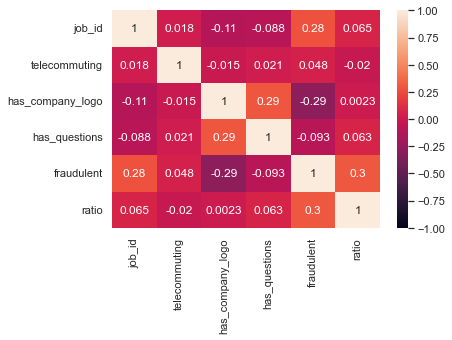

In [164]:
sns.heatmap(fake_job_postings_US.corr(),annot=True, vmin=-1, vmax=1);

In [165]:
fake_job_postings_US.nunique()

job_id                 11118
title                   6451
location                1827
department               725
salary_range             532
company_profile          884
description             8232
requirements            6465
benefits                3067
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            6
required_experience        8
required_education        14
industry                 125
function                  38
fraudulent                 2
state                     52
city                    1462
state_city              1796
ratio                     49
dtype: int64

In [166]:
fake_job_postings_US['required_experience'].unique()

array(['Not Specified', 'Internship', 'Mid-Senior level', 'Director',
       'Executive', 'Entry level', 'Associate', 'Not Applicable'],
      dtype=object)

## Combining all textual non categorical features into a single text column (unique values < 20)

In [167]:
fake_job_postings_US.fillna(" ",inplace = True)

fake_job_postings_US['text'] =  fake_job_postings_US['title'] + ' ' + fake_job_postings_US['location'] + ' ' + fake_job_postings_US['company_profile'] + ' ' + \
        fake_job_postings_US['description'] + ' ' + fake_job_postings_US['requirements'] + ' ' + fake_job_postings_US['benefits'] + ' ' + \
        fake_job_postings_US['industry'] + ' ' + fake_job_postings_US['function']


fake_job_postings_US.drop(['job_id', 'department', 'salary_range', 'title','location','company_profile','description','requirements','benefits','industry','function', 'city', 'state_city','has_questions', 'state'], axis = 1, inplace = True)



In [168]:
fake_job_postings_US

,telecommuting,has_company_logo,employment_type,required_experience,required_education,fraudulent,ratio,text
0,0,0,Not Specified,Not Specified,Not Specified,0,0.05,SENIOR FINANCE SOFTWARE RESEARCHER AND ENGINEE...
1,0,1,Part-time,Internship,Not Specified,0,0.05,Wordpress Designer and Expert for Startup | St...
2,0,0,Not Specified,Not Specified,Not Specified,0,0.05,"Senior Publishing Specialist US, NY, New York..."
3,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0,0.05,"Regional Account Manager US, NY, New York Veri..."
4,0,1,Not Specified,Not Specified,Not Specified,0,0.05,"Program Manager US, NY, New York Roka Security..."
...,...,...,...,...,...,...,...,...
11113,0,0,Not Specified,Not Specified,Not Specified,0,0.00,"Web Analytics Specialist US, WY, Cheyenne Not..."
11114,0,0,Full-time,Entry level,Bachelor's Degree,0,0.00,"Content Contributor US, WY, Cheyenne Not Speci..."
11115,0,0,Not Specified,Not Specified,Not Specified,0,0.00,"Content Strategist US, WY, Cheyenne Not Specif..."
11116,0,1,Contract,Entry level,Bachelor's Degree,0,0.00,Graduates: English Teacher Abroad (Conversatio...


In [169]:
fake_job_postings_US.dtypes

telecommuting            int64
has_company_logo         int64
employment_type         object
required_experience     object
required_education      object
fraudulent               int64
ratio                  float64
text                    object
dtype: object

In [170]:
split_df1=fake_job_postings_US.copy()

In [171]:
split_df1.drop('text',axis=1)

,telecommuting,has_company_logo,employment_type,required_experience,required_education,fraudulent,ratio
0,0,0,Not Specified,Not Specified,Not Specified,0,0.05
1,0,1,Part-time,Internship,Not Specified,0,0.05
2,0,0,Not Specified,Not Specified,Not Specified,0,0.05
3,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0,0.05
4,0,1,Not Specified,Not Specified,Not Specified,0,0.05
...,...,...,...,...,...,...,...
11113,0,0,Not Specified,Not Specified,Not Specified,0,0.00
11114,0,0,Full-time,Entry level,Bachelor's Degree,0,0.00
11115,0,0,Not Specified,Not Specified,Not Specified,0,0.00
11116,0,1,Contract,Entry level,Bachelor's Degree,0,0.00


## Label encoding for dtype=object

In [172]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in split_df1.columns:
    if split_df1[col].dtype == 'object':
        split_df1[col] = le.fit_transform(split_df1[col])

In [173]:
split_df1=split_df1[['telecommuting','has_company_logo','employment_type','required_experience','required_education','fraudulent','ratio']]



In [174]:
split_df1

,telecommuting,has_company_logo,employment_type,required_experience,required_education,fraudulent,ratio
0,0,0,2,7,6,0,0.05
1,0,1,4,4,6,0,0.05
2,0,0,2,7,6,0,0.05
3,1,1,1,5,1,0,0.05
4,0,1,2,7,6,0,0.05
...,...,...,...,...,...,...,...
11113,0,0,2,7,6,0,0.00
11114,0,0,1,2,1,0,0.00
11115,0,0,2,7,6,0,0.00
11116,0,1,0,2,1,0,0.00


## Merging encoded columns with column text

In [175]:
split_df1['text']=fake_job_postings_US['text']

In [176]:
split_df1

,telecommuting,has_company_logo,employment_type,required_experience,required_education,fraudulent,ratio,text
0,0,0,2,7,6,0,0.05,SENIOR FINANCE SOFTWARE RESEARCHER AND ENGINEE...
1,0,1,4,4,6,0,0.05,Wordpress Designer and Expert for Startup | St...
2,0,0,2,7,6,0,0.05,"Senior Publishing Specialist US, NY, New York..."
3,1,1,1,5,1,0,0.05,"Regional Account Manager US, NY, New York Veri..."
4,0,1,2,7,6,0,0.05,"Program Manager US, NY, New York Roka Security..."
...,...,...,...,...,...,...,...,...
11113,0,0,2,7,6,0,0.00,"Web Analytics Specialist US, WY, Cheyenne Not..."
11114,0,0,1,2,1,0,0.00,"Content Contributor US, WY, Cheyenne Not Speci..."
11115,0,0,2,7,6,0,0.00,"Content Strategist US, WY, Cheyenne Not Specif..."
11116,0,1,0,2,1,0,0.00,Graduates: English Teacher Abroad (Conversatio...


In [179]:
fake_job_postings_US1=split_df1.copy()

In [180]:
fake_job_postings_US1.shape

(11118, 8)

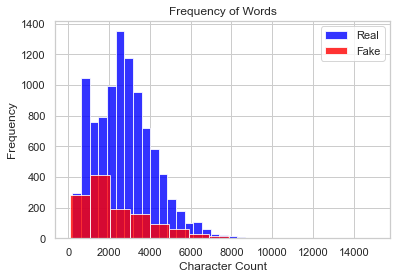

In [181]:
fake_job_postings_US1['character_count'] = fake_job_postings_US1.text.apply(len)

fake_job_postings_US1[fake_job_postings_US1.fraudulent==0].character_count.plot(bins=35, kind='hist', color='blue', 
                                       label='Real', alpha=0.8)
fake_job_postings_US1[fake_job_postings_US1.fraudulent==1].character_count.plot(kind='hist', color='red', 
                                       label='Fake', alpha=0.8)
plt.legend()
plt.title('Frequency of Words')
plt.xlabel("Character Count");

In [182]:
fake_job_postings_US1

,telecommuting,has_company_logo,employment_type,required_experience,required_education,fraudulent,ratio,text,character_count
0,0,0,2,7,6,0,0.05,SENIOR FINANCE SOFTWARE RESEARCHER AND ENGINEE...,2574
1,0,1,4,4,6,0,0.05,Wordpress Designer and Expert for Startup | St...,2521
2,0,0,2,7,6,0,0.05,"Senior Publishing Specialist US, NY, New York...",1533
3,1,1,1,5,1,0,0.05,"Regional Account Manager US, NY, New York Veri...",4653
4,0,1,2,7,6,0,0.05,"Program Manager US, NY, New York Roka Security...",1163
...,...,...,...,...,...,...,...,...,...
11113,0,0,2,7,6,0,0.00,"Web Analytics Specialist US, WY, Cheyenne Not...",726
11114,0,0,1,2,1,0,0.00,"Content Contributor US, WY, Cheyenne Not Speci...",687
11115,0,0,2,7,6,0,0.00,"Content Strategist US, WY, Cheyenne Not Specif...",574
11116,0,1,0,2,1,0,0.00,Graduates: English Teacher Abroad (Conversatio...,575


## Text Analysis

In [183]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [184]:
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

In [185]:
text = fake_job_postings_US1.text.to_list()
text = ' '.join(text)
tokens_text = word_tokenize(text)

In [186]:
lower_tokens = [t.lower() for t in tokens_text]
word_freq = Counter(lower_tokens)
print(Counter.most_common(word_freq, 10))

[(',', 259230), ('and', 227992), ('to', 128309), ('the', 114196), ('.', 110484), ('of', 89952), ('a', 82730), ('in', 72911), ('with', 54561), ('for', 51963)]


In [187]:
text_only_alphabets = [t for t in lower_tokens if t.isalpha()]

In [188]:
english_stopped = stopwords.words('english')
no_stops = [t for t in text_only_alphabets if t not in english_stopped]

In [189]:
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
bow = Counter(lemmatized)
print(Counter.most_common(bow, 10))

[('experience', 23275), ('service', 23233), ('work', 21896), ('customer', 19780), ('team', 19343), ('company', 17897), ('u', 17720), ('specified', 16014), ('business', 14400), ('client', 13356)]


In [190]:
fake_job_postings_US1

,telecommuting,has_company_logo,employment_type,required_experience,required_education,fraudulent,ratio,text,character_count
0,0,0,2,7,6,0,0.05,SENIOR FINANCE SOFTWARE RESEARCHER AND ENGINEE...,2574
1,0,1,4,4,6,0,0.05,Wordpress Designer and Expert for Startup | St...,2521
2,0,0,2,7,6,0,0.05,"Senior Publishing Specialist US, NY, New York...",1533
3,1,1,1,5,1,0,0.05,"Regional Account Manager US, NY, New York Veri...",4653
4,0,1,2,7,6,0,0.05,"Program Manager US, NY, New York Roka Security...",1163
...,...,...,...,...,...,...,...,...,...
11113,0,0,2,7,6,0,0.00,"Web Analytics Specialist US, WY, Cheyenne Not...",726
11114,0,0,1,2,1,0,0.00,"Content Contributor US, WY, Cheyenne Not Speci...",687
11115,0,0,2,7,6,0,0.00,"Content Strategist US, WY, Cheyenne Not Specif...",574
11116,0,1,0,2,1,0,0.00,Graduates: English Teacher Abroad (Conversatio...,575


In [191]:
fake_job_postings_US1.to_csv('fake_job_postings_cleaned.csv')

In [192]:
fake_job_postings_US.shape

(11118, 8)